<p> Run a simulation of filling in a network based on the 7 de Septiembre neighborhood layout in Araijan </p>
<p>**(.inp and .config files already written)**</p>
<p> Below you see how to:</p>
<ul>
<li>Set boundary and initial conditions </li>
<li>Run a simulation until time T= 1200 s</li>
<li>plot time series of pressure head at different points in a single pipe</li>
<li>plot time series of pressure head at sample points in various pipes</li>
<li>plot space dependence of pressure head at a certain time</li>
<li>look at velocities</li>
<li>plot network layout</li>
</ul>

In [15]:
#import modules for simulation and plotting
import sys  #for importing files you need
sys.path.append("..")  
from allthethings import PyNetwork, PyPipe_ps   #network and pipe classes
import numpy as np                              #for generally doing math
import matplotlib.pyplot as plt                 #for plotting
%pylab inline                                   
from writeit import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#specify input files
fi = "../indata/check7deSeptiembre.inp"    
fc = "../indata/check7deSeptiembre.config" 
mtype = 1                             #model type. set =0 for uniform cross-section channel flow (has not been tested for awhile)
#create a network, n1 denotes the name of the network. It is like reading the file
n1 = PyNetwork(fi,fc,mtype)
#show the layout of the network, not necessary!
n1.showLayout()

   pipe | start node | end node
-----------------------------------
     0  |  0         | 1
     1  |  1         | 2
     2  |  2         | 3
     3  |  3         | 4
     4  |  4         | 5
     5  |  5         | 7
     6  |  7         | 8
     7  |  5         | 6
     8  |  4         | 9
     9  |  3         | 8
     10  |  8         | 10
     11  |  10         | 11
     12  |  11         | 12
     13  |  11         | 13


   node | #incoming pipes
-------------------------
  0     |  1
  1     |  2
  2     |  2
  3     |  3
  4     |  3
  5     |  3
  6     |  1
  7     |  2
  8     |  3
  9     |  1
  10     |  2
  11     |  3
  12     |  1
  13     |  1


0.792325375237 0.785398163397


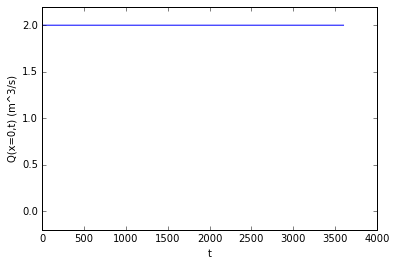

In [3]:
#create time series Q(x=0, t) = q0 for t<T/2, 0 for t>=T/2
q0 = 2 #inflow boundary value (m^3/s), used to create the Q0 vector
M = n1.M   #number of time steps
T = n1.T   #simulation length (in seconds)
Q0 = q0*np.ones(M+1);    #This is the actual inflow,q is only used to create Q0 vector        
#for i in range(M/2,M+1):        
#    Q0[i] = 0

#look at this time series
t = linspace(0,n1.T,M+1)
plot(t,Q0)
ylim(-.1*Q0[0],1.1*Q0[0])  # set the limitation of y axis: -0.1*q - 1.1*q
xlabel('t')
ylabel('Q(x=0,t) (m^3/s)')
#assign this inflow pattern as a boundary condition for junction 0 (at the left end of pipe 0)
n1.setbVal(0,Q0)
# set initial condition to (H = 10m, Q = Q0) in pipe 0, 'empty' everywhere else)
#make a single pipe "PyPipe" to evalute correct cross-sectional area corresponding to H = 10m
p1 = PyPipe_ps(n1.Ns[0], n1.Ds[0],n1.Ls[0], M, n1.a[0])      
h0 = p1.AofH(10,False)                         # Area when H=10m

print h0, (n1.Ds[0])**2*pi/4                 # Add this line to check codes
A00 = h0*np.ones(n1.Ns[0])                  # n1.Ns[0]-number of grids in pipe 0. So all the grids in pipe 0 have the same area h0
Q00 = Q0[0]*np.ones(n1.Ns[0])
n1.setIC(0,A00,Q00)                       # set the IC of pipe 0
A00 = h0*np.ones(n1.Ns[1])
Q00 = Q0[0]*np.ones(n1.Ns[1])
n1.setIC(1,A00,Q00)                       # set the IC of pipe 1, almost the same as pipe 0
Np = n1.Nedges # number of pipes
for k in range(2,Np):                     #pipe number starts from 0, ends at Np-1. Here from 2 to Np-1
    A00 = 0.01*n1.Ds[k]*np.ones(n1.Ns[k])  #set other pipes to 1e-3*(pipe diameter) to avoid near-zero roundoff issues
    Q00 = np.zeros(n1.Ns[k])
    n1.setIC(k, A00, Q00)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


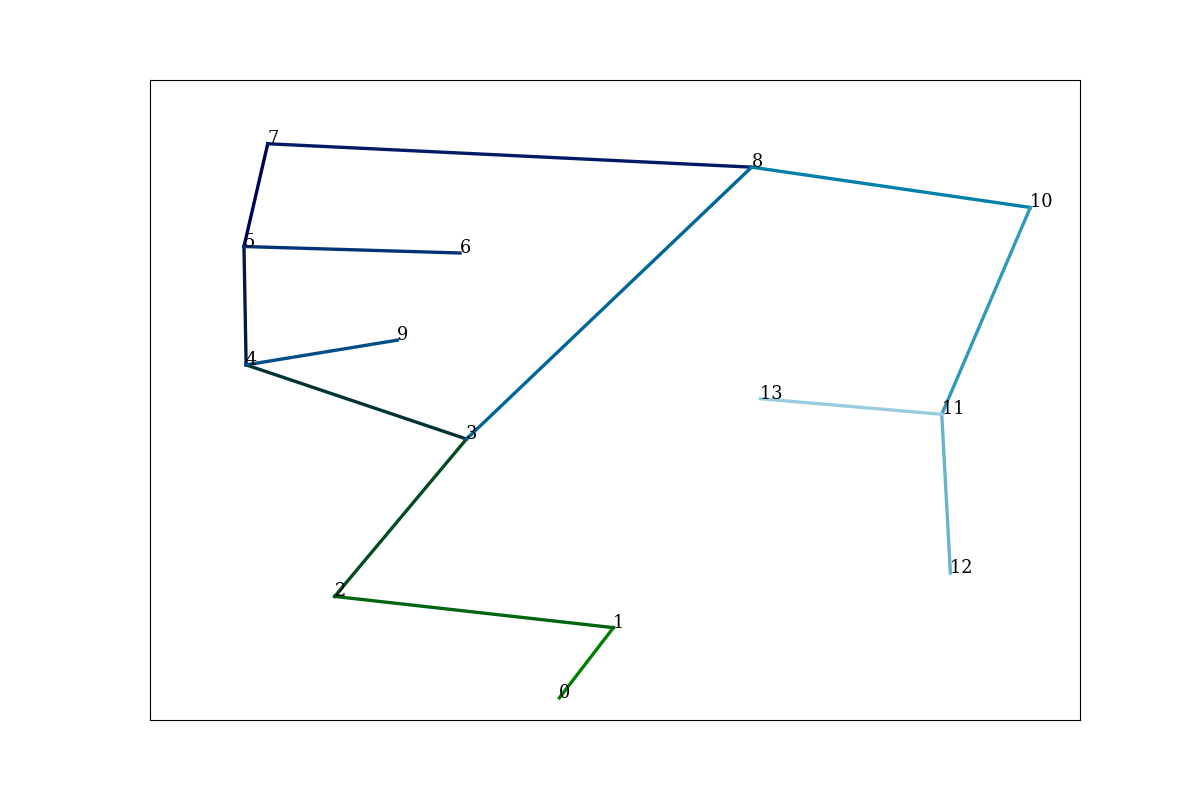

   pipe | start node | end node
-----------------------------------
     0  |  0         | 1
     1  |  1         | 2
     2  |  2         | 3
     3  |  3         | 4
     4  |  4         | 5
     5  |  5         | 7
     6  |  7         | 8
     7  |  5         | 6
     8  |  4         | 9
     9  |  3         | 8
     10  |  8         | 10
     11  |  10         | 11
     12  |  11         | 12
     13  |  11         | 13


   node | #incoming pipes
-------------------------
  0     |  1
  1     |  2
  2     |  2
  3     |  3
  4     |  3
  5     |  3
  6     |  1
  7     |  2
  8     |  3
  9     |  1
  10     |  2
  11     |  3
  12     |  1
  13     |  1


In [4]:
# uncomment line below to take a look at initial conditions before starting simulation
#n1.showCurrentData()
#plotNetworkLayout (xs, ys, conns, ls, Np)    # must combine with code lines below
#plotNetworkLayout(xs,ys,conns,ls,Np)
(xs,ys,conns,ls) = getBasicConnectivity(fi)
Np= shape(conns) [0]
%pylab notebook
plotNetworkLayout (xs, ys, conns, ls, Np) 
n1.showLayout()

In [4]:
#Run the simulation!
dt = T/float(M)#time step
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)


In [5]:
m32gal = 264.172   #conversion factor, m^3 to gallons
m2psi = 1.42       #conversion factor, m of pressure head to psi
mdx = min([n1.Ls[i]/n1.Ns[i] for i in range(n1.Nedges)])
#print timing information
print "Simulated time T = %f s" %n1.T
print "Solve time = %f  s" %n1.solve_time
print "dt = %f" %dt
print "inflow volume = %.2f gallons" % ((n1.getTotalVolume()-V0)*m32gal)
print "pressure wave speed is %f m/s"% (max(n1.a))
print "CFL = 1/(dx/dt)*(max wave speed) = %f" % (max(n1.cmax)*dt/mdx)

Simulated time T = 3600.000000 s
Solve time = 142.978155  s
dt = 0.075000
inflow volume = 1131986.86 gallons
pressure wave speed is 100.000000 m/s
CFL = 1/(dx/dt)*(max wave speed) = 0.782071


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>


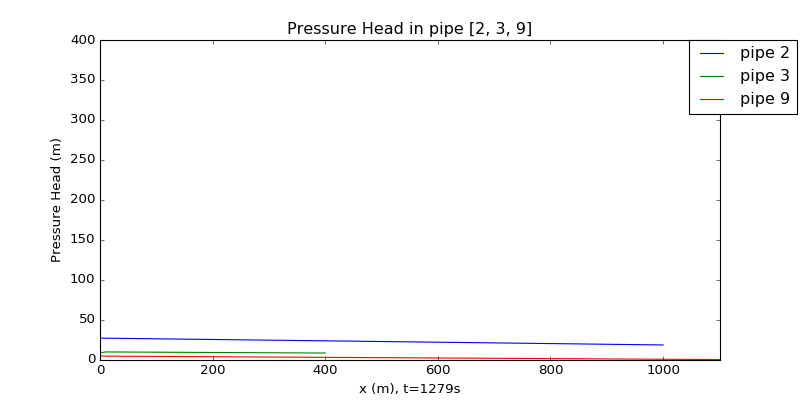

In [18]:
from __future__ import division
import sys
sys.path.append("..")    
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
#%pylab inline
%pylab notebook
from writeit import *
import pickle
import time

#*********************************************************************************
pipe_interest=[2,3,9]
t_delta=1              # unit: s
t_start=0               # unit:s
t_end=3600               # unit: s
#*********************************************************************************

# create x axis
x_interest=[]
pipe_length=0
for j in pipe_interest: 
    x = np.linspace(0,n1.Ls[j],n1.Ns[j])
    x_interest.append(x)

#create initial figure
from matplotlib import animation
fig = plt.figure(figsize= (10,5))
plt.xlim(0,x_interest[-1][-1]+1)
plt.ylim(-0.1, 400)
lines = [plt.plot([], [],label='pipe {}'.format(pipe_interest[i]))[0] for i in range(len(pipe_interest))] # number of lines plot on the figure
plt.xlabel('x (m)')        
plt.ylabel('Pressure Head (m)')
plt.title('Pressure Head in pipe %s'%str(pipe_interest)) 
# initialization function: plot the background of each frame

def init():
    for line in lines:
        line.set_data([], [])
    return lines

Mi_draw=int(t_delta/dt)   # difne how many steps to skip
M_start=int(t_start/dt)
M_total=int(t_end/dt)

def animate(index): 
    for i,line in enumerate(lines):             
        j=pipe_interest[i]
        Hx = n1.pressureSpaceSeries(j,M_start+index*Mi_draw)  
        #this returns H as a function of x in pipe j at time step m
        line.set_data(x_interest[i],Hx)
        plt.xlabel('x (m), t=%ds'%((M_start+index*Mi_draw)*dt))
        #line.set_label('pipe %d t=%.2f s'%(j,(dt*(M_start+index*Mi_draw))))
                      
    return lines         
    #legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

step = int((M_total-M_start)/Mi_draw)
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=step, interval=10, blit=True)
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)
plt.show()
#anim.save('/home/xin/pipes/examples/output_data/T_junction_detection/pipe %s %.0f-%.0f s.mp4'%(str(pipe_interest),t_start,t_end))

<IPython.core.display.Javascript object>


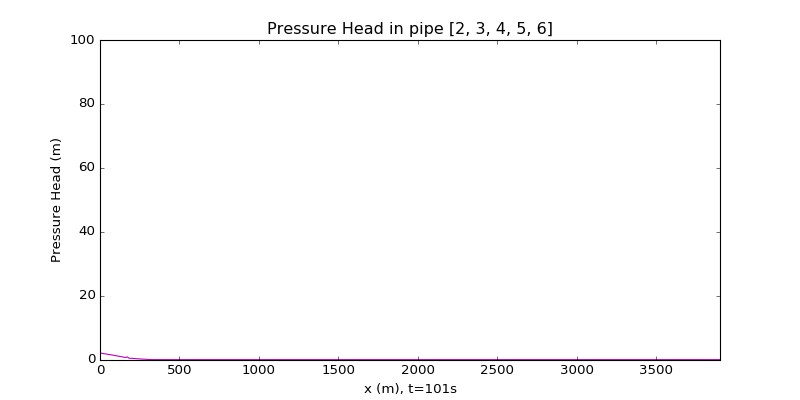

In [22]:
#*********************************************************************************
pipe_interest=[2,3,4,5,6]
t_delta=1              # unit: s
t_start=0               # unit:s
t_end=3600               # unit: s
#*********************************************************************************

# animation already imported above
plt.ion()
plt.show()

# create x axis
x_interest=[]
pipe_length=0
for j in pipe_interest: 
    x = np.linspace(pipe_length,pipe_length+n1.Ls[j],n1.Ns[j])
    x_interest.append(x)
    pipe_length=pipe_length+n1.Ls[j]
x_interest_combine = np.concatenate(x_interest,axis =0)

#create initial figure
fig = plt.figure(figsize= (10,5))
plt.xlim(0,x_interest[-1][-1]+1)
plt.ylim(-0.1, 100)
lines = [plt.plot([], [])[0] for i in range(len(pipe_interest))] # number of lines plot on the figure
plt.xlabel('x (m)')        
plt.ylabel('Pressure Head (m)')
plt.title('Pressure Head in pipe %s'%str(pipe_interest)) 
# initialization function: plot the background of each frame

def init():
    for line in lines:
        line.set_data([], [])
    return lines

Mi_draw=int(t_delta/dt)   # difne how many steps to skip
M_start=int(t_start/dt)
M_total=int(t_end/dt)
H_interest=[]

def animate(index):
    H_interest_tfixed = []
    for i,line in enumerate(lines):             
        j=pipe_interest[i]
        Hx = n1.pressureSpaceSeries(j,M_start+index*Mi_draw)  
        #this returns H as a function of x in pipe j at time step m
        H_interest_tfixed.append(Hx)
    H_interest.append(H_interest_tfixed)
    H_interest_combine = np.concatenate(H_interest[index],axis =0)
    line.set_data(x_interest_combine,H_interest_combine)
    plt.xlabel('x (m), t=%ds'%((M_start+index*Mi_draw)*dt))
                      
    return lines         
    #legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

step = int((M_total-M_start)/Mi_draw)
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=step, interval=1, blit=True)
plt.show()
#anim.save('/home/xin/pipes/examples/output_data/T_junction_detection/conti-pipe %s %.0f-%.0f s.mp4'%(str(pipe_interest),t_start,t_end))

In [ ]:
#show time series at a sensor in the middle of each pipe in the network
# import a nice colormap
from matplotlib import cm
import matplotlib.colors as colors
cNorm  = colors.Normalize(vmin=0, vmax=Np+1)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('hsv') )
fig = figure(figsize= (15,5))
t = linspace(0,T,M+1)
interesting = arange(0,Np) #pipes you are interested in (currently all)
interesting1 = array([0,1,2,4,6])
for i in interesting1: 
    #look at pressure time series in i^th pipe, pbar(A(X*, t)), where X* = L/2 for pipe length L, and t =0, dt, 2*dt,...dt*M
    P1 = n1.pressureTimeSeries(i,n1.Ns[i]/2-1) 
    plot(t,P1,color =scalarMap.to_rgba(i), label = "pipe %d" %i) 
legend(ncol=7, loc = (0,1))
ax = gca()
ax.set_xlabel('t (s)')
#xlabel('t(s)')
#ylabel('H(m)')
ax.set_ylabel('H (m)')

In [ ]:
#show pressure time series at different locations along the length of a single pipe
i = 1  #pipe number you want to look at
fig = figure(figsize= (15,5))
#new color map
xs = np.arange(1,n1.Ns[i]+1,4)           # all the grids, increment is 2
print xs
print len(xs)
cNorm  = colors.Normalize(vmin=0, vmax=xs[-1]+10)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('ocean') )
t = np.linspace(0,n1.T,M+1)
for J in range(0,len(xs),3):
    cval = scalarMap.to_rgba(xs[J])
    dx = n1.Ls[i]/float(n1.Ns[i])
    P2 = n1.pressureTimeSeries(i,J)
    q=plot(t,P2,color =cval,label="x = %.1f"%(dx*xs[J]))
ax = gca()
ax.set_title('Pipe %d'%i)
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$\bar{p}$ (m)')
#legend()
#legend(loc = 'upper left')
#savefig("../sensors_pipe%d.eps"%i, format='eps')

In [ ]:
#show how pressure profile varies in space at the end of the run 
i = 5  # pipe you want to look at
fig = figure(figsize= (10,5))
#m = M  #time slice you want to look at, the simulation only has M steps, so m here refers to the end of the simulation
for m in range(0,n1.M+1,6000):
    Px = n1.pressureSpaceSeries(i,m)
    x = linspace(0,n1.Ls[i],n1.Ns[i])
    plot(x,Px,label = 't=%.2f s'%(dt*m))
    # title('Pipe %d at time %.2f s'%(i,dt*m))
    legend()
    draw()
    xlabel('x')
    ylabel(r'$\bar{p}(m)$')
    fig = figure(figsize= (10,5))


In [ ]:
#plot network layout
(xs,ys,conns,ls) = getBasicConnectivity(fi)
Np = shape(conns)[0]
plotNetworkLayout(xs,ys,conns,ls,Np)

In [ ]:
# The following codes are only used to try python functions, the purpose is about learning python
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()


In [ ]:
help(gca)

In [ ]:

1*np.ones(2)